# Python Code 1: Law of Large Number

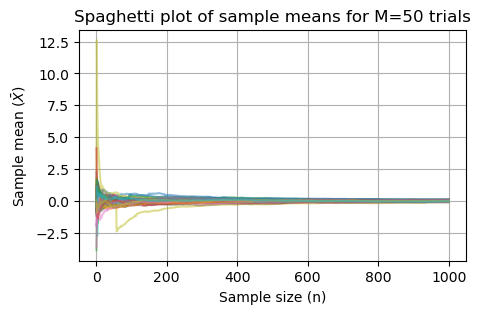

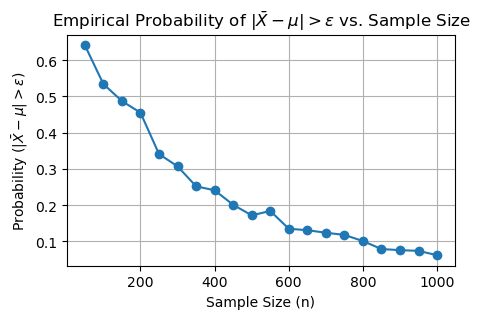

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Part 1: Spaghetti plot
np.random.seed(0)  # For reproducibility

# Parameters
n = 1000
M = 50
nu = 3  # degrees of freedom for t-distribution

# Plotting spaghetti plot
plt.figure(figsize=(5, 3))
for i in range(M):
    plt.plot(range(1, n+1), np.cumsum(t.rvs(df=nu, size=n)) / np.arange(1, n+1), alpha=0.5)
plt.title('Spaghetti plot of sample means for M=50 trials')
plt.xlabel('Sample size (n)')
plt.ylabel('Sample mean ($\\bar{X}$)')
plt.grid(True)
plt.show()

# Part 2: Empirical probability plot
N = 1000  # Max sample size
M = 1000  # Number of trials
epsilon = 0.1

# Computing probabilities
probabilities = []
sample_sizes = np.arange(50, N+1, 50)  # Step through sample sizes from 50 to N

for n in sample_sizes:
    count_within_epsilon = 0
    for _ in range(M):
        sample_mean = t.rvs(df=nu, size=n).mean()
        if abs(sample_mean) > epsilon:
            count_within_epsilon += 1
    probabilities.append(count_within_epsilon / M)

# Plotting the probabilities
plt.figure(figsize=(5, 3))
plt.plot(sample_sizes, probabilities, marker='o')
plt.title('Empirical Probability of $|\\bar{X} - \\mu| > \\epsilon$ vs. Sample Size')
plt.xlabel('Sample Size (n)')
plt.ylabel('Probability ($|\\bar{X} - \\mu| > \\epsilon$)')
plt.grid(True)
plt.show()


# Python Code 2: Central Limit Theorem

C:\Users\kimyo145\AppData\Local\Temp\ipykernel_85828\1824262420.py:66: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot(x_grid, norm.cdf(x_grid), 'k--', label='CDF N(0,1)', color='gray')


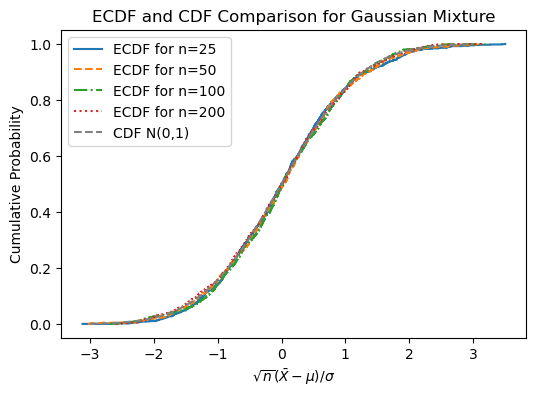

MISE for n=25: 6.810376993432263e-05
MISE for n=50: 4.621751431711643e-05
MISE for n=100: 0.0001057901737034972
MISE for n=200: 2.122670620627591e-05


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for Gaussian Mixture
mu1, sigma1 = 0, 1    # Mean and std dev of first normal distribution
mu2, sigma2 = 3, 1.5  # Mean and std dev of second normal distribution
pi1, pi2 = 0.5, 0.5    # Proportion of the first and second distribution

# Combined mean and variance
mu = pi1 * mu1 + pi2 * mu2
sigma = np.sqrt(pi1 * (sigma1**2) + pi2 * (sigma2**2)
                + pi1 * ((mu - mu1)**2) + pi2 * ((mu - mu2)**2))

# Sample sizes to test
sample_sizes = [25, 50, 100, 200]
M = 1000  # Number of experiments

# Function to generate samples from a Gaussian Mixture
def generate_gaussian_mixture(n):
    n1 = np.random.binomial(n, pi1)
    n2 = n - n1
    samples1 = np.random.normal(mu1, sigma1, n1)
    samples2 = np.random.normal(mu2, sigma2, n2)
    return np.concatenate((samples1, samples2))

# Function to calculate empirical distribution function
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

# Create figure for ECDF and CDF comparison
fig, ax = plt.subplots(figsize=(6, 4))

# Define line styles for different sample sizes
line_styles = ['-', '--', '-.', ':']

mise_values = []

for i, n in enumerate(sample_sizes):
    sample_means = []
    for _ in range(M):
        samples = generate_gaussian_mixture(n)
        sample_mean = np.mean(samples)
        sample_means.append(sample_mean)
    
    # Normalize sample means
    sample_means = np.array(sample_means)
    normalized_means = np.sqrt(n) * ((sample_means - mu) / sigma)
    
    # Calculate and plot ECDF
    x, y = ecdf(normalized_means)
    ax.step(x, y, where='post', label=f'ECDF for n={n}', linestyle=line_styles[i])
    
    # Calculate MISE
    x_grid = np.linspace(min(x), max(x), 500)
    ecdf_values = np.interp(x_grid, x, y)
    cdf_values = norm.cdf(x_grid)
    mise = np.mean((ecdf_values - cdf_values)**2)
    mise_values.append(mise)

# Plotting CDF of standard normal distribution
x_grid = np.linspace(-3, 3, 100)
ax.plot(x_grid, norm.cdf(x_grid), 'k--', label='CDF N(0,1)', color='gray')

ax.set_title('ECDF and CDF Comparison for Gaussian Mixture')
ax.set_xlabel(r'$\sqrt{n}(\bar{X}-\mu)/\sigma$')
ax.set_ylabel('Cumulative Probability')
ax.legend()

plt.show()

# Print MISE values for each sample size
for size, mise in zip(sample_sizes, mise_values):
    print(f'MISE for n={size}: {mise}')


# Python Code 2': Central Limit Theorem?

C:\Users\kimyo145\AppData\Local\Temp\ipykernel_85828\3803067313.py:66: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot(x_grid, norm.cdf(x_grid), 'k--', label='CDF N(0,1)', color='gray')


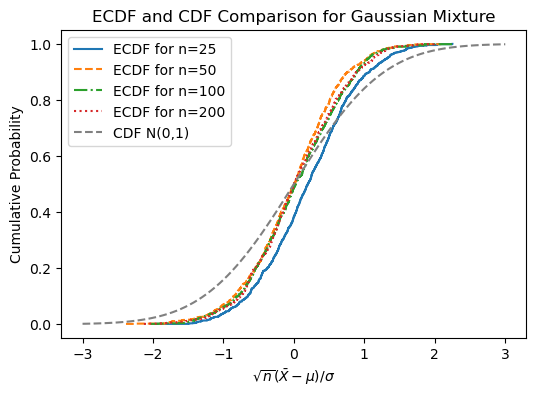

MISE for n=25: 0.007205579123976577
MISE for n=50: 0.004975204348917988
MISE for n=100: 0.0043165548262100156
MISE for n=200: 0.0047025555552852915


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for Gaussian Mixture
mu1, sigma1 = 0, 1    # Mean and std dev of first normal distribution
mu2, sigma2 = 3, 1.5  # Mean and std dev of second normal distribution
pi1, pi2 = 0.5, 0.5    # Proportion of the first and second distribution

# Combined mean and variance
mu = pi1 * mu1 + pi2 * mu2
sigma = np.sqrt(pi1 * (sigma1**2) + pi2 * (sigma2**2)
                + pi1 * ((mu - mu1)**2) + pi2 * ((mu - mu2)**2))

# Sample sizes to test
sample_sizes = [25, 50, 100, 200]
M = 1000  # Number of experiments

# Function to generate samples from a Gaussian Mixture
def generate_gaussian_mixture(n):
    n1 = int(n*pi1) # previous example: n1 = np.random.binomial(n, pi1)
    n2 = n - n1
    samples1 = np.random.normal(mu1, sigma1, n1)
    samples2 = np.random.normal(mu2, sigma2, n2)
    return np.concatenate((samples1, samples2))

# Function to calculate empirical distribution function
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

# Create figure for ECDF and CDF comparison
fig, ax = plt.subplots(figsize=(6, 4))

# Define line styles for different sample sizes
line_styles = ['-', '--', '-.', ':']

mise_values = []

for i, n in enumerate(sample_sizes):
    sample_means = []
    for _ in range(M):
        samples = generate_gaussian_mixture(n)
        sample_mean = np.mean(samples)
        sample_means.append(sample_mean)
    
    # Normalize sample means
    sample_means = np.array(sample_means)
    normalized_means = np.sqrt(n) * ((sample_means - mu) / sigma)
    
    # Calculate and plot ECDF
    x, y = ecdf(normalized_means)
    ax.step(x, y, where='post', label=f'ECDF for n={n}', linestyle=line_styles[i])
    
    # Calculate MISE
    x_grid = np.linspace(min(x), max(x), 500)
    ecdf_values = np.interp(x_grid, x, y)
    cdf_values = norm.cdf(x_grid)
    mise = np.mean((ecdf_values - cdf_values)**2)
    mise_values.append(mise)

# Plotting CDF of standard normal distribution
x_grid = np.linspace(-3, 3, 100)
ax.plot(x_grid, norm.cdf(x_grid), 'k--', label='CDF N(0,1)', color='gray')

ax.set_title('ECDF and CDF Comparison for Gaussian Mixture')
ax.set_xlabel(r'$\sqrt{n}(\bar{X}-\mu)/\sigma$')
ax.set_ylabel('Cumulative Probability')
ax.legend()

plt.show()

# Print MISE values for each sample size
for size, mise in zip(sample_sizes, mise_values):
    print(f'MISE for n={size}: {mise}')


# Python Code 3: Newton-Raphson Method

C:\Users\kimyo145\AppData\Local\Temp\ipykernel_85828\862663703.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


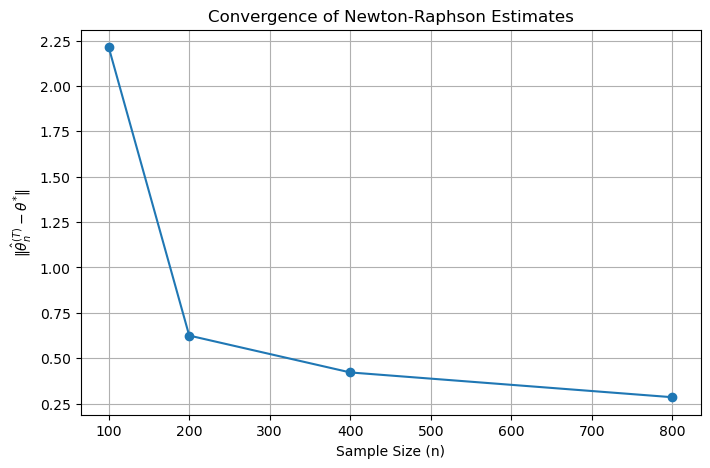

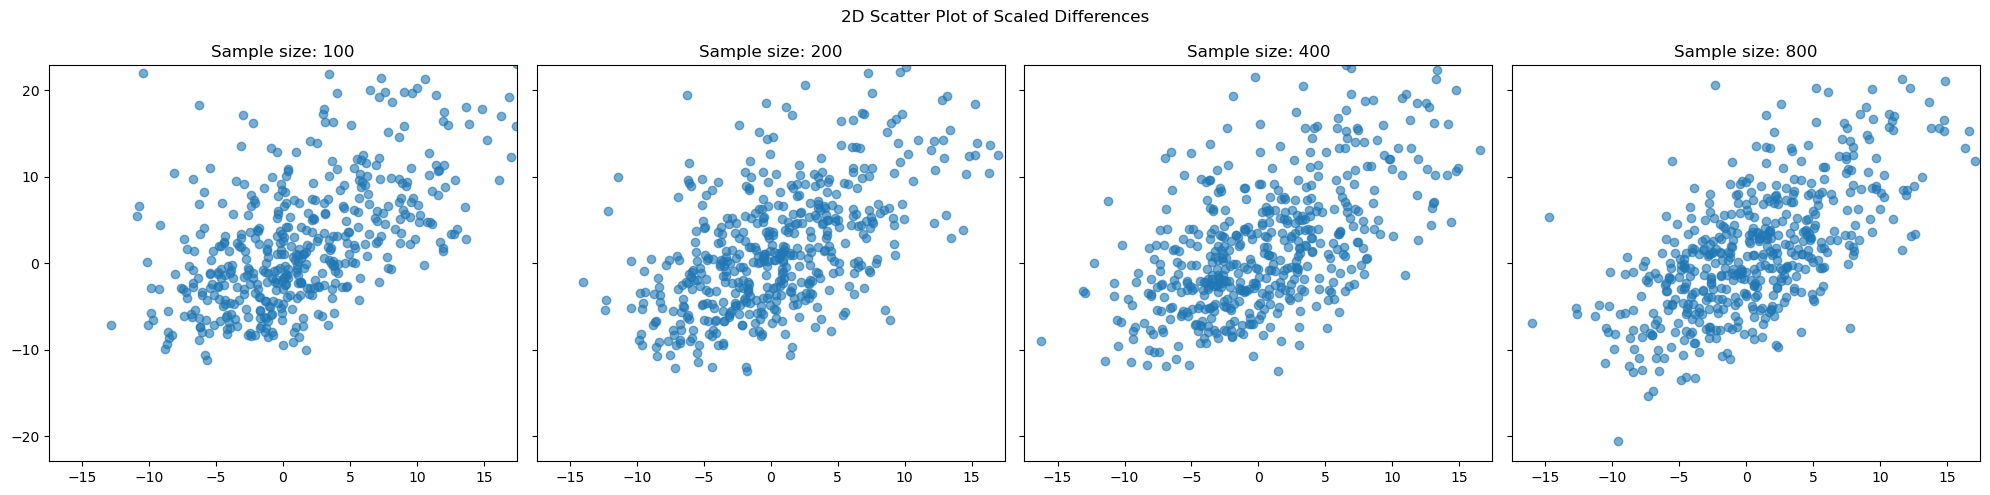

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, norm

def sigmoid(x):
    """Stable sigmoid function to prevent overflow."""
    return 1 / (1 + np.exp(-x))

def logistic_regression(x, y, theta_init, max_iter=25):
    """Performs logistic regression using the Newton-Raphson method."""
    n = len(y)
    theta = theta_init
    indicator = (y+1)/2  # Convert class labels from {1, -1} to {1, 0}

    for _ in range(max_iter):
        p = sigmoid(x @ theta)  # Current estimate of probability
        gradient = x.T @ (p - indicator) / n
        W = np.diag(p * (1 - p))
        Hessian = x.T @ W @ x / n
        theta -= np.linalg.inv(Hessian) @ gradient
    return theta

def generate_data(n, mu_y, sigma_epsilon):
    """Generates binary classification data with logistic features."""
    y = 2 * bernoulli.rvs(0.5, size=n) - 1
    x = norm.rvs(loc=[mu_y[yy] for yy in y], scale=sigma_epsilon, size=n)
    return np.vstack([np.ones(n), x]).T, y  # Add intercept

# Setup parameters
sample_sizes = [100, 200, 400, 800]
M = 500
mu_y = {1: 1, -1: -2}
sigma_epsilon = 1.0
theta_star = np.array([(mu_y[-1]**2 - mu_y[1]**2) / (2 * sigma_epsilon**2),
                       (mu_y[1] - mu_y[-1]) / (sigma_epsilon**2)])

norm_diffs = []
scaled_diffs = {n: [] for n in sample_sizes}

# Perform simulations
for n in sample_sizes:
    theta_estimates = []
    for _ in range(M):
        x, y = generate_data(n, mu_y, sigma_epsilon)
        theta_init = np.random.uniform(-0.1, 0.1, 2)
        theta_hat = logistic_regression(x, y, theta_init)
        norm_diff = np.linalg.norm(theta_hat - theta_star)
        theta_estimates.append(norm_diff)
        scaled_diff = np.sqrt(n) * (theta_hat - theta_star)
        scaled_diffs[n].append(scaled_diff)
    norm_diffs.append(np.mean(theta_estimates))

# Plot for norm differences
plt.figure(figsize=(8, 5))
plt.plot(sample_sizes, norm_diffs, marker='o')
plt.xlabel('Sample Size (n)')
plt.ylabel(r'$\|\hat{\theta}_{n}^{(T)} - \theta^{*}\|$')
plt.title('Convergence of Newton-Raphson Estimates')
plt.grid(True)
plt.show()

# Plot scaled differences as scatter plots
fig, axes = plt.subplots(1, len(sample_sizes), figsize=(20, 5), sharex=True, sharey=True)
for i, n in enumerate(sample_sizes):
    diffs = np.array(scaled_diffs[n])
    sigma_x = np.std(diffs[:, 0])
    sigma_y = np.std(diffs[:, 1])
    limit_x = 3 * sigma_x
    limit_y = 3 * sigma_y

    axes[i].scatter(diffs[:, 0], diffs[:, 1], alpha=0.6)
    axes[i].set_title(f'Sample size: {n}')
    axes[i].set_xlim([-limit_x, limit_x])
    axes[i].set_ylim([-limit_y, limit_y])

plt.suptitle('2D Scatter Plot of Scaled Differences')
plt.tight_layout()
plt.show()


# Python Code 4: Gradient Descent Method

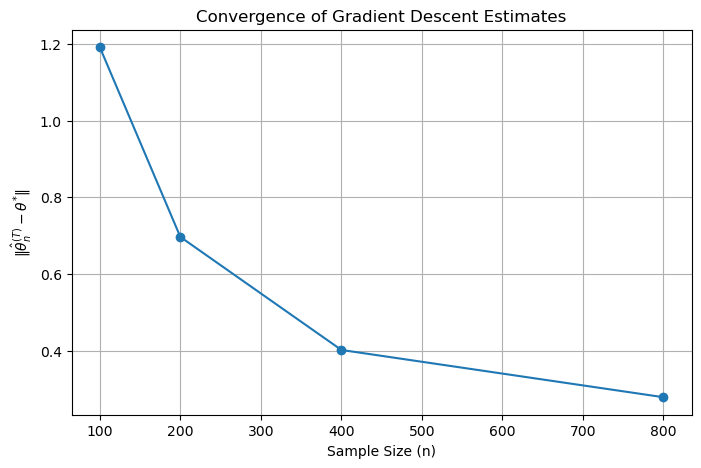

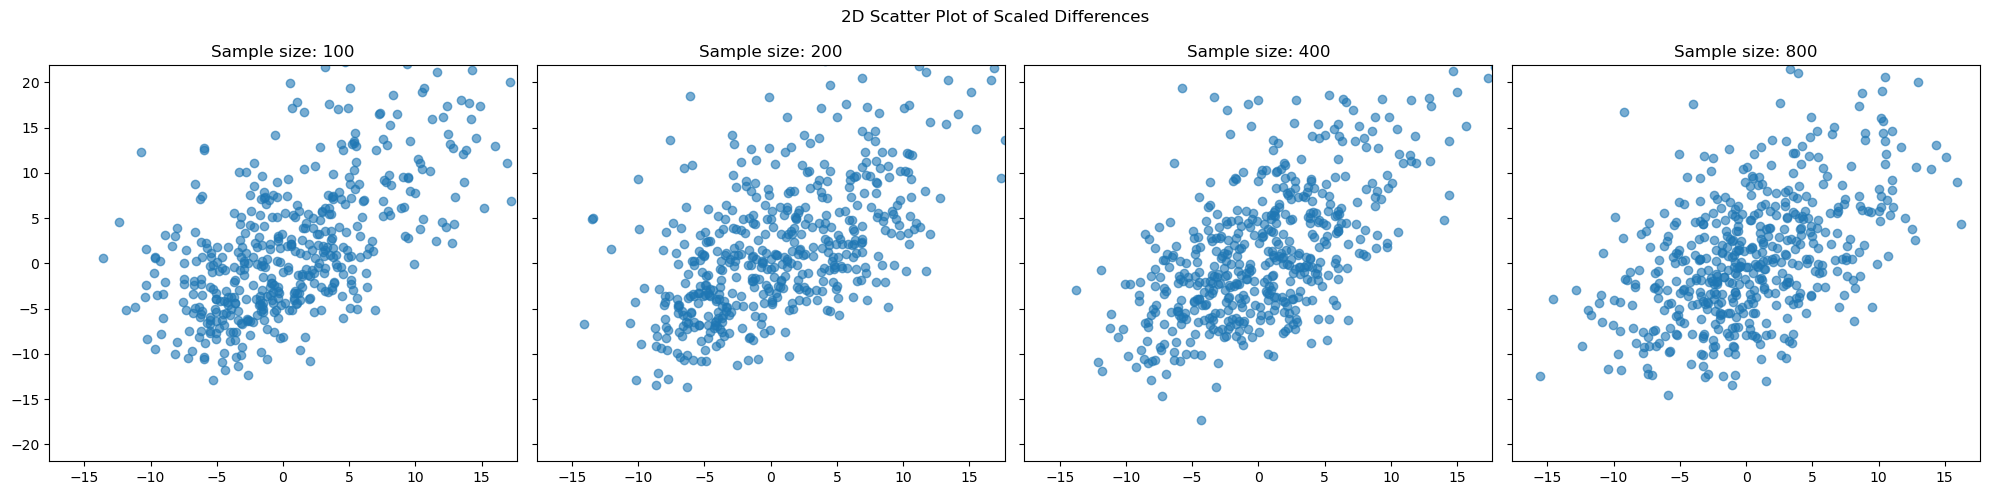

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, norm

def sigmoid(x):
    """Stable sigmoid function to prevent overflow."""
    return 1 / (1 + np.exp(-x))

def gd_logistic_regression(x, y, theta_init, init_learning_rate=20.0, max_iter=1000):
    """Performs logistic regression using Gradient Descent."""
    n = len(y)
    theta = theta_init
    indicator = (y+1)/2  # Convert class labels from {1, -1} to {1, 0}

    for t in range(max_iter):
        learning_rate = init_learning_rate*(50/(t+50))
        p = sigmoid(x @ theta)
        gradient = x.T @ (p - indicator)/n
        theta -= learning_rate * gradient
    return theta

def generate_data(n, mu_y, sigma_epsilon):
    """Generates binary classification data with logistic features."""
    y = 2 * bernoulli.rvs(0.5, size=n) - 1
    x = norm.rvs(loc=[mu_y[yy] for yy in y], scale=sigma_epsilon, size=n)
    return np.vstack([np.ones(n), x]).T, y  # Add intercept

# Setup parameters
sample_sizes = [100, 200, 400, 800]
M = 500
mu_y = {1: 1, -1: -2}
sigma_epsilon = 1.0
theta_star = np.array([(mu_y[-1]**2 - mu_y[1]**2) / (2 * sigma_epsilon**2),
                       (mu_y[1] - mu_y[-1]) / sigma_epsilon])

norm_diffs = []
scaled_diffs = {n: [] for n in sample_sizes}

# Perform simulations
for n in sample_sizes:
    theta_estimates = []
    for _ in range(M):
        x, y = generate_data(n, mu_y, sigma_epsilon)
        theta_init = np.random.uniform(-0.1, 0.1, 2)
        theta_hat = gd_logistic_regression(x, y, theta_init)
        norm_diff = np.linalg.norm(theta_hat - theta_star)
        theta_estimates.append(norm_diff)
        scaled_diff = np.sqrt(n) * (theta_hat - theta_star)
        scaled_diffs[n].append(scaled_diff)
    norm_diffs.append(np.mean(theta_estimates))

# Plot for norm differences
plt.figure(figsize=(8, 5))
plt.plot(sample_sizes, norm_diffs, marker='o')
plt.xlabel('Sample Size (n)')
plt.ylabel(r'$\|\hat{\theta}_{n}^{(T)} - \theta^{*}\|$')
plt.title('Convergence of Gradient Descent Estimates')
plt.grid(True)
plt.show()

# Plot scaled differences as scatter plots
fig, axes = plt.subplots(1, len(sample_sizes), figsize=(20, 5), sharex=True, sharey=True)
for i, n in enumerate(sample_sizes):
    diffs = np.array(scaled_diffs[n])
    sigma_x = np.std(diffs[:, 0])
    sigma_y = np.std(diffs[:, 1])
    limit_x = 3 * sigma_x
    limit_y = 3 * sigma_y

    axes[i].scatter(diffs[:, 0], diffs[:, 1], alpha=0.6)
    axes[i].set_title(f'Sample size: {n}')
    axes[i].set_xlim([-limit_x, limit_x])
    axes[i].set_ylim([-limit_y, limit_y])

plt.suptitle('2D Scatter Plot of Scaled Differences')
plt.tight_layout()
plt.show()


# PyTorch Code 1: Dense Network with One Hidden Layer

Epoch: 1, Test Loss: 0.0003, Accuracy: 9108/10000 (91%)
Epoch: 2, Test Loss: 0.0003, Accuracy: 9231/10000 (92%)
Epoch: 3, Test Loss: 0.0002, Accuracy: 9339/10000 (93%)
Epoch: 4, Test Loss: 0.0002, Accuracy: 9414/10000 (94%)
Epoch: 5, Test Loss: 0.0002, Accuracy: 9449/10000 (94%)


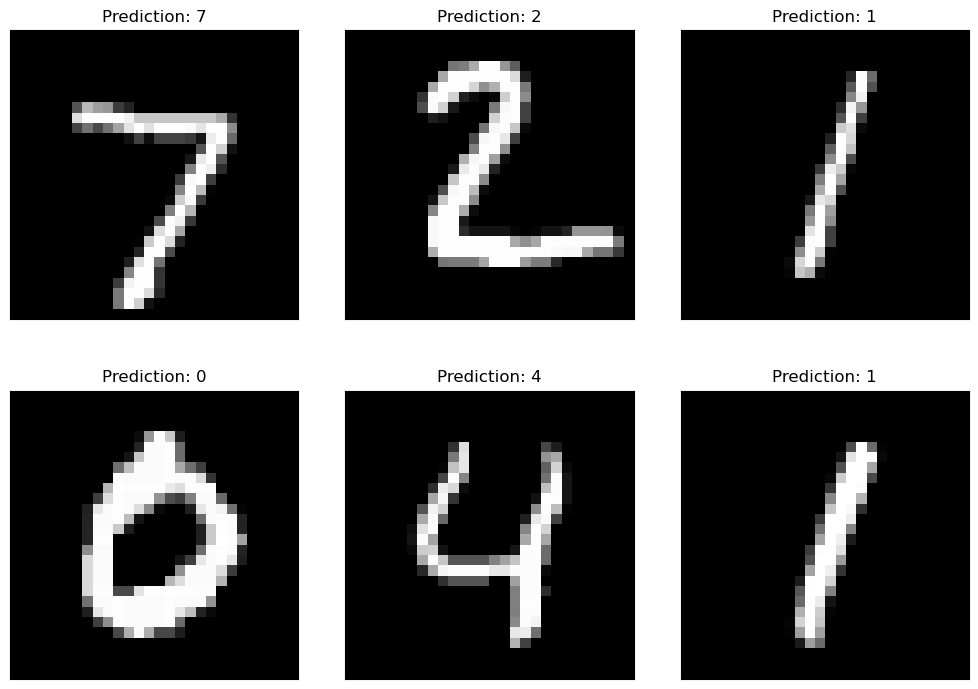

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# Define the neural network with one hidden layer
class FCNet(nn.Module):
    def __init__(self):
        super(FCNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)  # Flatten 28x28 images to a 784 vector for each image
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(512, 10)  # 10 output classes

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the images
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

# Initialize the network and optimizer
model = FCNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

# Training the network
def train(num_epochs, model, loaders):
    train_loader, test_loader = loaders
    for epoch in range(num_epochs):
        model.train()
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
        
        model.eval()
        test_loss = 0
        correct = 0
        with torch.no_grad():
            for data, target in test_loader:
                output = model(data)
                test_loss += criterion(output, target).item()
                pred = output.data.max(1, keepdim=True)[1]
                correct += pred.eq(target.data.view_as(pred)).sum()
        test_loss /= len(test_loader.dataset)
        print(f'Epoch: {epoch+1}, Test Loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.0f}%)')

# Visualization of results
def visualize(model, loader):
    model.eval()
    data, _ = next(iter(loader))
    with torch.no_grad():
        output = model(data)
    plt.figure(figsize=(10, 8))
    for i in range(6):
        plt.subplot(2, 3, i + 1)
        plt.tight_layout()
        plt.imshow(data[i][0], cmap='gray', interpolation='none')
        plt.title("Prediction: {}".format(output.data.max(1, keepdim=True)[1][i].item()))
        plt.xticks([])
        plt.yticks([])
    plt.show()

# Run training and visualization
train(5, model, (train_loader, test_loader))
visualize(model, test_loader)


# PyTorch Code 2: Convolutional Neural Network

Epoch: 1, Test Loss: 0.0001, Accuracy: 9614/10000 (96%)
Epoch: 2, Test Loss: 0.0001, Accuracy: 9741/10000 (97%)
Epoch: 3, Test Loss: 0.0001, Accuracy: 9762/10000 (98%)
Epoch: 4, Test Loss: 0.0001, Accuracy: 9819/10000 (98%)
Epoch: 5, Test Loss: 0.0000, Accuracy: 9832/10000 (98%)


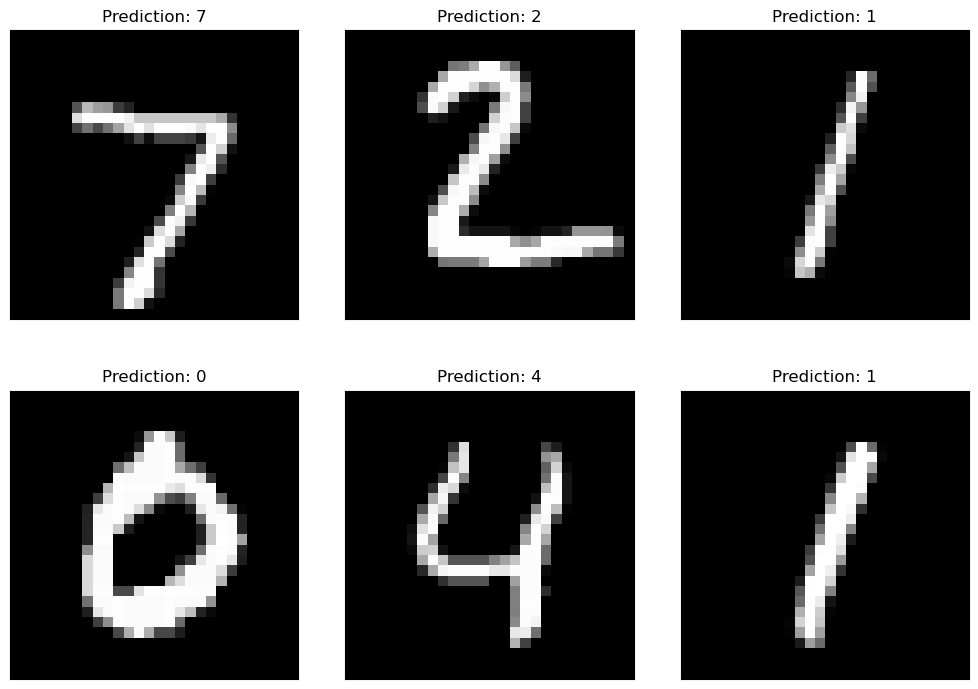

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# Define the neural network architecture
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.pool = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 320)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

# Initialize the network and optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

# Train the network
def train(num_epochs, model, loaders):
    train_loader, test_loader = loaders
    for epoch in range(num_epochs):
        model.train()
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
        
        model.eval()
        test_loss = 0
        correct = 0
        with torch.no_grad():
            for data, target in test_loader:
                output = model(data)
                test_loss += criterion(output, target).item()
                pred = output.data.max(1, keepdim=True)[1]
                correct += pred.eq(target.data.view_as(pred)).sum()
        test_loss /= len(test_loader.dataset)
        print(f'Epoch: {epoch+1}, Test Loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.0f}%)')

# Visualizing some results
def visualize(model, loader):
    model.eval()
    data, _ = next(iter(loader))
    with torch.no_grad():
        output = model(data)
    plt.figure(figsize=(10, 8))
    for i in range(6):
        plt.subplot(2, 3, i + 1)
        plt.tight_layout()
        plt.imshow(data[i][0], cmap='gray', interpolation='none')
        plt.title("Prediction: {}".format(output.data.max(1, keepdim=True)[1][i].item()))
        plt.xticks([])
        plt.yticks([])
    plt.show()

# Run training and visualization
train(5, model, (train_loader, test_loader))
visualize(model, test_loader)
